# TF-IDF Scripts

### Import Libraries

In [483]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import word_tokenize, pos_tag_sents, pos_tag
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
import os, glob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import sys
!{sys.executable} -m pip install detoxify

from detoxify import Detoxify
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Custom Functions and File Imports

In [484]:
stemming = PorterStemmer()
stops = set(stopwords.words("english")) 
counters = []

def removeStopWords(row):
    stemmed = row['stemmed']
    cleaned = [w for w in stemmed if not w in stops]
    cleaned = listToString(cleaned)
    return cleaned

def tokenize(row):
    message = row['message'].lower()
    tokens = word_tokenize(message)
    tok_words = [w for w in tokens if w.isalpha()]
    return tok_words
    
def stem(row):
    tokens = row['tokenized']
    stemmed = [stemming.stem(word) for word in tokens]
    return stemmed

def listToString(lst):
    text = ' '.join(lst)
    return text

def posTag(row):
    message = row['message']
    tokens = word_tokenize(message)
    tagged = nltk.pos_tag(tokens)
    return tagged

def posCounter(row):
    message = row['message']
    tokens = word_tokenize(message)
    tagged = nltk.pos_tag(tokens)
    counts = Counter( tag for word,  tag in tagged)
    counters.append(counts)

In [485]:
os.chdir(r"D:\Programs\Jupyter Notebooks\Thesis RIP Scripts\Annotations\foxnews3") # CHANGE VALUE PER BATCH
files = []
for file in glob.glob("*.csv"):
    print(file)
    files.append(file)
    
print(files)    

annotatorA.csv
annotatorB.csv
annotatorC.csv
['annotatorA.csv', 'annotatorB.csv', 'annotatorC.csv']


In [486]:
coder1 = pd.read_csv(files[0])
coder1.fillna(0)
coder2 = pd.read_csv(files[1])
coder2.fillna(0)
#coder3 = pd.read_excel('usanews0full_3.xlsx')
coder3 = pd.read_csv(files[2])
coder3.fillna(0)

,Unnamed: 0,author,message,time_text,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,0,username@QetQewrtrr,Woooooo Biden won. Finally!,00:33:00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,username@Tervylpeav,lol keep wishing,01:01:00,0.0,0.0,0.0,0.0,0.0,0.0
2,2,username@rLuLTeeaTe,trump 4 the people,01:02:00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,username@eC MhMeii,USA!!,01:34:00,0.0,0.0,0.0,0.0,0.0,0.0
4,4,username@AATETMCEAM,PUMP ET UP,01:34:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
78,78,username@RRRAARRAAR,"Losers still mad Trump lost, they can't take L...",08:29:00,0.0,0.0,0.0,0.0,0.0,0.0
79,79,username@biobTsstss,uneducated people would vote for biden. disgra...,08:32:00,0.0,0.0,0.0,0.0,0.0,0.0
80,80,username@laaeKn enl,ehhh ehhh ehhhhhhhhhh,08:33:00,0.0,0.0,0.0,0.0,0.0,0.0
81,81,username@yiaaaOaz k,All we know is that we don't know the truth,08:37:00,0.0,0.0,0.0,0.0,0.0,0.0


### Combine Documents Per Label

In [487]:
dHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Direct Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Direct Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Direct Harassment'] == 1.0]

dHarassment = pd.concat([temp0, temp1, temp2])
dHarassment.drop(dHarassment.columns.difference(['Unnamed: 0', 'message','Direct Harassment']), 1, inplace=True)

dHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
dHarassment
#duplicateRowsDF = dHarassment[dHarassment.duplicated()]
#duplicateRowsDF

,Unnamed: 0,message,Direct Harassment


In [488]:
hSpeech = pd.DataFrame()
temp0 = coder1.loc[coder1['Hate Speech'] == 1.0]
temp1 = coder2.loc[coder2['Hate Speech'] == 1.0]
temp2 = coder3.loc[coder3['Hate Speech'] == 1.0]

hSpeech = pd.concat([temp0, temp1, temp2])
hSpeech.drop(hSpeech.columns.difference(['Unnamed: 0', 'message','Hate Speech']), 1, inplace=True)

hSpeech.drop_duplicates(subset ="message", keep = False, inplace = True)
hSpeech

,Unnamed: 0,message,Hate Speech
18,18,Philadelphia is full of riggers,1.0
44,44,biden is a joke,1.0
45,45,FOX NEWS OR FAKE NEWS. PLEASE NOT SUPPORT THE ...,1.0
59,59,how can you live Biden Ben?? you must look int...,1.0


In [489]:
sHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Sexual Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Sexual Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Sexual Harassment'] == 1.0]

sHarassment = pd.concat([temp0, temp1, temp2])
sHarassment.drop(sHarassment.columns.difference(['Unnamed: 0', 'message','Sexual Harassment']), 1, inplace=True)

sHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
sHarassment

,Unnamed: 0,message,Sexual Harassment


In [490]:
trolling = pd.DataFrame()
temp0 = coder1.loc[coder1['Trolling'] == 1.0]
temp1 = coder2.loc[coder2['Trolling'] == 1.0]
temp2 = coder3.loc[coder3['Trolling'] == 1.0]

trolling = pd.concat([temp0, temp1, temp2])
trolling.drop(trolling.columns.difference(['Unnamed: 0', 'message','Trolling']), 1, inplace=True)

trolling.drop_duplicates(subset ="message", keep = False, inplace = True)
trolling

,Unnamed: 0,message,Trolling
37,37,These people don’t care about your health. It’...,1.0


In [491]:
others = pd.DataFrame()
temp0 = coder1.loc[coder1['Others'] == 1.0]
temp1 = coder2.loc[coder2['Others'] == 1.0]
temp2 = coder3.loc[coder3['Others'] == 1.0]

others = pd.concat([temp0, temp1, temp2])
others.drop(others.columns.difference(['Unnamed: 0', 'message','Others']), 1, inplace=True)

others.drop_duplicates(subset ="message", keep = False, inplace = True)
others

,Unnamed: 0,message,Others


In [492]:
toxic = pd.DataFrame()
temp0 = coder1.loc[coder1['Toxic'] == 1.0]
temp1 = coder2.loc[coder2['Toxic'] == 1.0]
temp2 = coder3.loc[coder3['Toxic'] == 1.0]

toxic = pd.concat([temp0, temp1, temp2])
toxic.drop(toxic.columns.difference(['Unnamed: 0', 'message','Toxic']), 1, inplace=True)

toxic.drop_duplicates(subset ="message", keep = False, inplace = True)
toxic

,Unnamed: 0,message,Toxic


## NLP Text Processing Stuff


In [493]:
if not dHarassment.empty:
    dHarassment['tokenized'] = dHarassment.apply(tokenize, axis=1)
    dHarassment['stemmed'] = dHarassment.apply(stem, axis=1)
    dHarassment['stop_words'] = dHarassment.apply(removeStopWords, axis=1)
dHarassment

,Unnamed: 0,message,Direct Harassment


In [494]:
if not hSpeech.empty:
    hSpeech['tokenized'] = hSpeech.apply(tokenize, axis=1)
    hSpeech['stemmed'] = hSpeech.apply(stem, axis=1)
    hSpeech['stop_words'] = hSpeech.apply(removeStopWords, axis=1)
hSpeech

,Unnamed: 0,message,Hate Speech,tokenized,stemmed,stop_words
18,18,Philadelphia is full of riggers,1.0,"[philadelphia, is, full, of, riggers]","[philadelphia, is, full, of, rigger]",philadelphia full rigger
44,44,biden is a joke,1.0,"[biden, is, a, joke]","[biden, is, a, joke]",biden joke
45,45,FOX NEWS OR FAKE NEWS. PLEASE NOT SUPPORT THE ...,1.0,"[fox, news, or, fake, news, please, not, suppo...","[fox, news, or, fake, news, pleas, not, suppor...",fox news fake news pleas support demoralis parti
59,59,how can you live Biden Ben?? you must look int...,1.0,"[how, can, you, live, biden, ben, you, must, l...","[how, can, you, live, biden, ben, you, must, l...",live biden ben must look sign countri communis...


In [495]:
if not sHarassment.empty:
    sHarassment['tokenized'] = sHarassment.apply(tokenize, axis=1)
    sHarassment['stemmed'] = sHarassment.apply(stem, axis=1)
    sHarassment['stop_words'] = sHarassment.apply(removeStopWords, axis=1)
sHarassment

,Unnamed: 0,message,Sexual Harassment


In [496]:
if not trolling.empty:
    print('test')
    trolling['tokenized'] = trolling.apply(tokenize, axis=1)
    trolling['stemmed'] = trolling.apply(stem, axis=1)
    trolling['stop_words'] = trolling.apply(removeStopWords, axis=1)
trolling

test


,Unnamed: 0,message,Trolling,tokenized,stemmed,stop_words
37,37,These people don’t care about your health. It’...,1.0,"[these, people, don, t, care, about, your, hea...","[these, peopl, don, t, care, about, your, heal...",peopl care health nwo crime syndic


In [497]:
if not others.empty:
    others['tokenized'] = others.apply(tokenize, axis=1)
    others['stemmed'] = others.apply(stem, axis=1)
    others['stop_words'] = others.apply(removeStopWords, axis=1)
others

,Unnamed: 0,message,Others


In [498]:
if not toxic.empty:
    toxic['tokenized'] = toxic.apply(tokenize, axis=1)
    toxic['stemmed'] = toxic.apply(stem, axis=1)
    toxic['stop_words'] = toxic.apply(removeStopWords, axis=1)
    toxic['pos'] = toxic.apply(posTag, axis=1)
    toxic.apply(posCounter, axis=1)
    print(sum(counters, Counter()))
toxic

,Unnamed: 0,message,Toxic


### TFIDF Stuff

#### TFIDF On Direct Harassment

In [499]:
#no text processing
df = pd.DataFrame()
if not dHarassment.empty:
    vectorizer = TfidfVectorizer()
    dHar = vectorizer.fit_transform(dHarassment['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(dHar.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [500]:
#stop words removed
df1 = pd.DataFrame()
if not dHarassment.empty:
    vectorizer = TfidfVectorizer()
    dHar = vectorizer.fit_transform(dHarassment['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(dHar.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

In [501]:
df.head()

""


In [502]:
df1.head()

""


In [503]:
if not dHarassment.empty:
    vals = vals[0:10]
    vals.plot.bar()

In [504]:
if not dHarassment.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

#### TFIDF on Hate Speech

In [505]:
df = pd.DataFrame()
if not hSpeech.empty:
    vectorizer = TfidfVectorizer()
    hSpe = vectorizer.fit_transform(hSpeech['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(hSpe.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [506]:
#stop words removed
df1 = pd.DataFrame()
if not hSpeech.empty:
    vectorizer = TfidfVectorizer()
    hSpe = vectorizer.fit_transform(hSpeech['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(hSpe.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

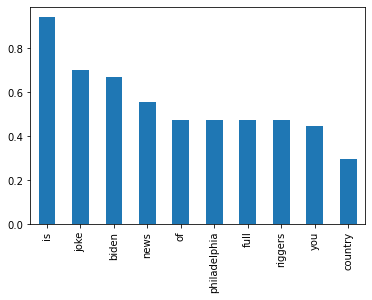

In [507]:
if not hSpeech.empty:
    vals = vals[0:10]
    vals.plot.bar()

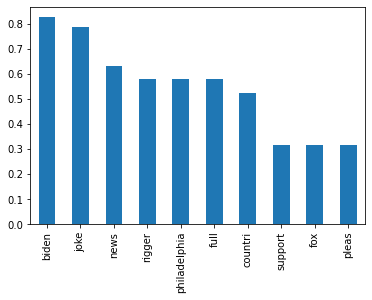

In [508]:
if not hSpeech.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

#### TFIDF on Sexual Harassment

In [509]:
df = pd.DataFrame()
if not sHarassment.empty:
    vectorizer = TfidfVectorizer()
    sHar = vectorizer.fit_transform(sHarassment['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(sHar.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [510]:
#stop words removed
df1 = pd.DataFrame()
if not sHarassment.empty:
    vectorizer = TfidfVectorizer()
    sHar = vectorizer.fit_transform(sHarassment['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(sHar.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

In [511]:
if not sHarassment.empty:
    vals = vals[0:10]
    vals.plot.bar()

In [512]:
if not sHarassment.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

#### TFIDF on Trolling

In [513]:
df = pd.DataFrame()
if not trolling.empty:
    vectorizer = TfidfVectorizer()
    troll = vectorizer.fit_transform(trolling['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(troll.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [514]:
#stop words removed
df1 = pd.DataFrame()
if not trolling.empty:
    vectorizer = TfidfVectorizer()
    troll = vectorizer.fit_transform(trolling['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(troll.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

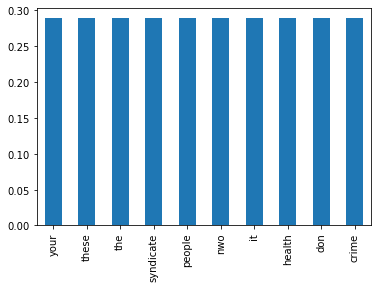

In [515]:
if not trolling.empty:
    vals = vals[0:10]
    vals.plot.bar()

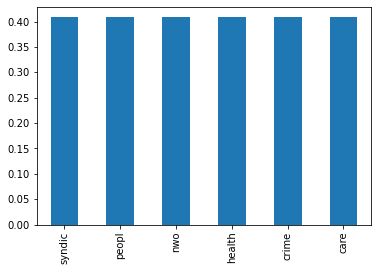

In [516]:
if not trolling.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

#### TFIDF on Others

In [517]:
df = pd.DataFrame()
if not others.empty:
    vectorizer = TfidfVectorizer()
    oth = vectorizer.fit_transform(others['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(oth.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [518]:
#stop words removed
df1 = pd.DataFrame()
if not others.empty:
    vectorizer = TfidfVectorizer()
    oth = vectorizer.fit_transform(others['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(oth.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

In [519]:
if not others.empty:
    vals = vals[0:10]
    vals.plot.bar()

In [520]:
if not others.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

#### TFIDF on Toxic

In [521]:
df = pd.DataFrame()
if not toxic.empty:
    vectorizer = TfidfVectorizer()
    tox = vectorizer.fit_transform(toxic['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(tox.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [522]:
#stop words removed
df1 = pd.DataFrame()
if not toxic.empty:
    vectorizer = TfidfVectorizer()
    tox = vectorizer.fit_transform(toxic['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(tox.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

In [523]:
if not toxic.empty:
    vals = vals[0:10]
    vals.plot.bar()

In [524]:
if not toxic.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

In [525]:
if not toxic.empty:
    arr = toxic['message'].to_list()
    arr 
    len(arr)

In [526]:
newDF = pd.DataFrame()
if not toxic.empty:
    results = Detoxify('unbiased').predict(arr)
    newDF = pd.DataFrame(results, index=arr).round(5)
newDF

""
